Simple notebook to generate a variety of graphs and store them in the file spec.


In [2]:
import networkx as nx
import random
from graph import GraphIO


Generate an unattributed ten node star graph and write it. This will result in an archive called `basic_unattributed.mgraph` conatining one directory `graph_0` which in turn has as single `edgelist.csv` file

In [3]:
#load default networkx graph
g = nx.generators.star_graph(10)

In [4]:
# create metagraph object with a single graph, no node attributes and no edge attributes
#attempt dump
GraphIO.dump(g, './ExampleGraphs/basic_unattributed.json')

We can also store node attributes for each graph. Next we load the graph we just created, add betweenness as a node attribute and dump it to disk again.
This will result in an archive called `basic_node_att.mgraph` with a file call `nodeatt_betweenness.json` being added to the `graph_0 directory` along with the same edgelist as above.


In [5]:
# load the star graph
g, _, _, _ = GraphIO.load("./ExampleGraphs/basic_unattributed.json")

In [6]:
# add betweeness attribute to nodes
bb = nx.betweenness_centrality(g)
nx.set_node_attributes(g, bb, "betweenness")

In [7]:
# dump
GraphIO.dump(g, './ExampleGraphs/basic_node_att.json')

Similarly, we can add arbitrary edge attributes to the graph. We will add a 'color' attribute to a few of the edges in the star graph.
This will result in an archive called `basic_attributed.mgraph` with the same structure as `basic_node_att.mgraph`, but with and new
file called `edgeatt_color.json` in the `graph_0` directory.

In [8]:
# load
g, edgeatts, nodeatts, graphatts = GraphIO.load('./ExampleGraphs/basic_node_att.json')
att = {(0, 1): "red",
       (0, 2): "blue",
       (0, 5): "red",
       (0, 8): "blue"}
nx.set_edge_attributes(g, att, "color")

In [9]:
# dump
GraphIO.dump(g, './ExampleGraphs/basic_attributed.json')

An arbitrary number of different node and edge attribute types can be added to each graph, each will result in a new `.json` file in that graph's directory.

We can also add weights to the graph. Weights are stored in networkx as a special edge attribute called 'weight'. The file spec writes weights,
if they exist, as a third column in `edgelist.csv`.

In [10]:
for edge in g.edges:
    g[edge[0]][edge[1]]['weight'] =random.randint(0, 5)

In [11]:
GraphIO.dump(g, './ExampleGraphs/weighted_attributed.json')


We can  have multiple attributes per node or edge

In [12]:
# load
g, edgeatts, nodeatts, graphatts = GraphIO.load('./ExampleGraphs/weighted_attributed.json')
att = {(0, 5): (2018, 2010, 2005),
       (0, 6): (2000,),
       (0, 2): (2020, 1999),
       }
nx.set_edge_attributes(g, att, "years")
GraphIO.dump(g, './ExampleGraphs/weighted_attributed_2.json')

We can also store multigraphs.

In [13]:
g, _, _, _ = GraphIO.load('./ExampleGraphs/weighted_attributed_2.json')

gm = nx.MultiGraph(g)

# add new colored edges
gm.add_edge(0, 1, color='green', weight=1)
gm.add_edge(5, 6, key=1, color='red', weight=3)
gm.add_edge(1, 5, key=1, color='blue', weight=8)
gm.add_edge(6, 2, key=1, color='yellow', weight=1)
gm.add_edge(0, 2, color='green', weight=2)

1

Now when we dump the multigraph, we will create an archive with both a `graph_0` and `graph_1` directory. Each will have an edgelist and attribute `.json` files.


In [14]:
GraphIO.dump(gm, './ExampleGraphs/weighted_attributed_multigraph.json')


when we load the multigraph again, we can convert it to a list of graphs:

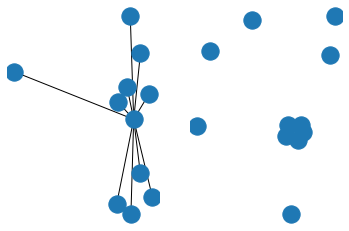

In [15]:
g, _, _, _ = GraphIO.load('./ExampleGraphs/weighted_attributed_multigraph.json')
import matplotlib.pyplot as plt
graphs = GraphIO.multigraph_to_graphs(g)
fig = plt.figure()
plt.subplot(1, 2, 1)
nx.draw(graphs[0])
plt.subplot(1, 2, 2)
nx.draw(graphs[1])
plt.show()

In [16]:
g_dict = {'one': graphs[0], 'two': graphs[1]}
# try converting back to multigraph
mg = GraphIO.graphs_to_multigraph(g_dict)
print("done")



done
